# Customer Churn Prediction

## Step1: Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step:2 Data Understanding

In [5]:
df = pd.read_csv("C:\Documents\Customer-Churn-Records.csv")

In [6]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [8]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [10]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [12]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [13]:
df.size

180000

## Step:3 Data Cleaning

In [15]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

## Step:4 Exploratory Data Analysis(EDA)

## 1. Customer Demographics

Insight: Distribution of customers by geography, gender, and age.

## Geography

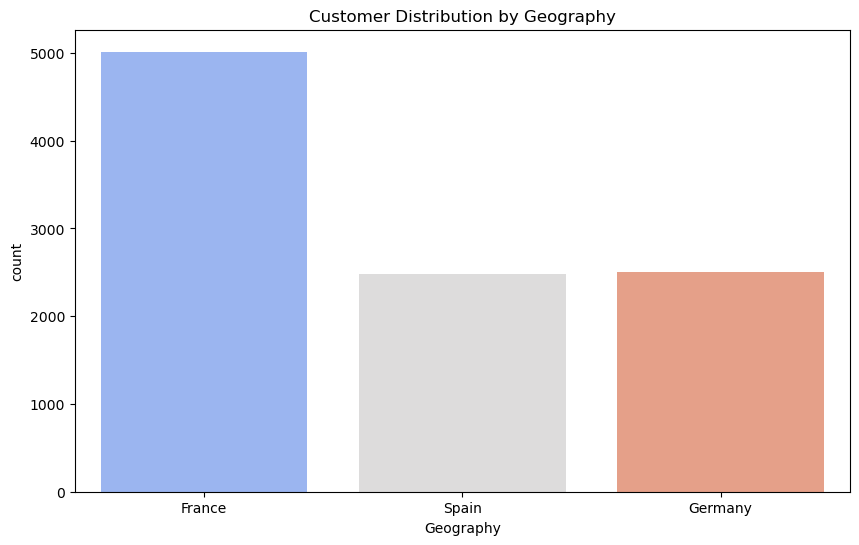

In [20]:
#Bar chart for geagraphy
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', data=df, palette='coolwarm')
plt.title("Customer Distribution by Geography")
plt.show()

The above Bar chart is showing the number of customers from each country.

## Gender

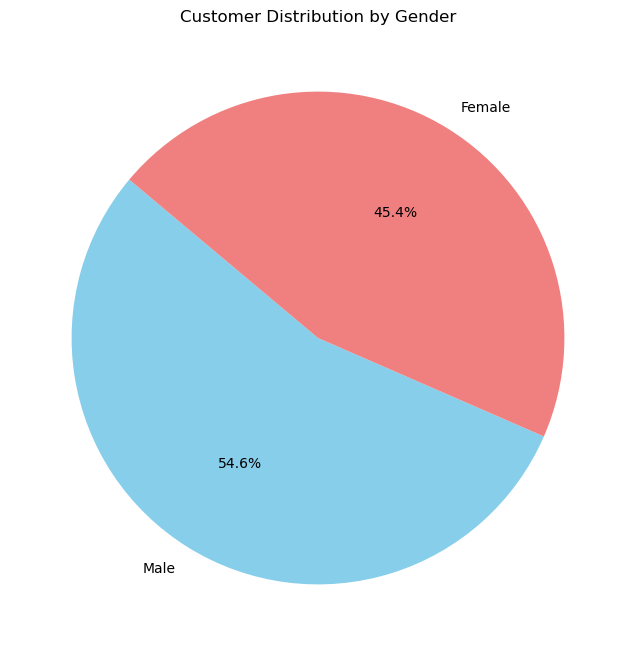

In [23]:
# Pie chart for Gender
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Customer Distribution by Gender')
plt.show()

The above Pie chart is displaying the proportion of male and female customers.

## Age

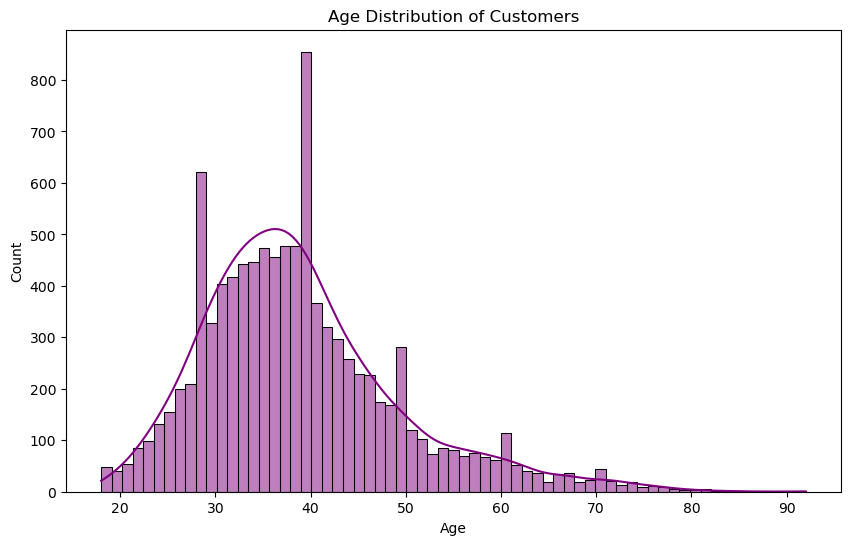

In [26]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='purple')
plt.title('Age Distribution of Customers')
plt.show()

The above Histogram is depicting the age distribution of customers.

## 2. Credit Score Analysis

Insight: Distribution of credit scores and comparison by geography. 

## Credit Score by Geography:

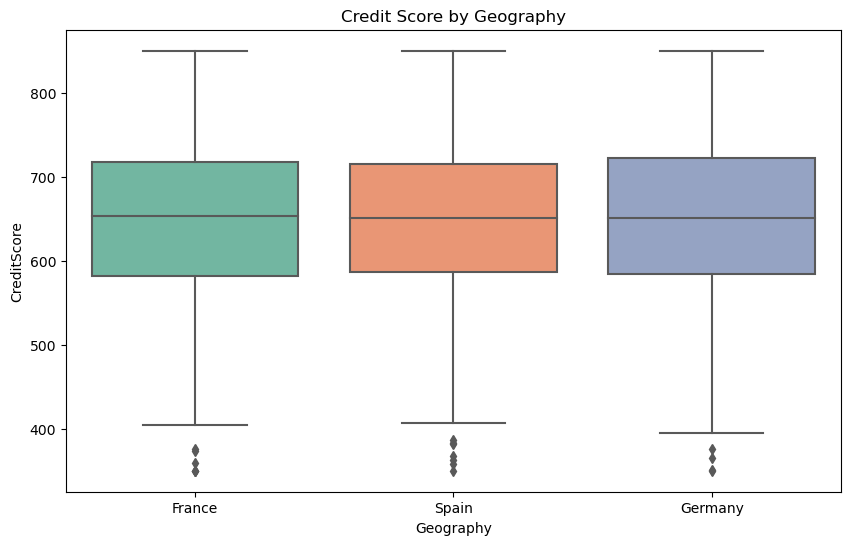

In [31]:
# Box plot for Credit Score by Geography
plt.figure(figsize=(10, 6))
sns.boxplot(x='Geography', y='CreditScore', data=df, palette='Set2')
plt.title('Credit Score by Geography')
plt.show()

The above Box plot is comparing credit scores across different countries.

## Credit Score Distribution:

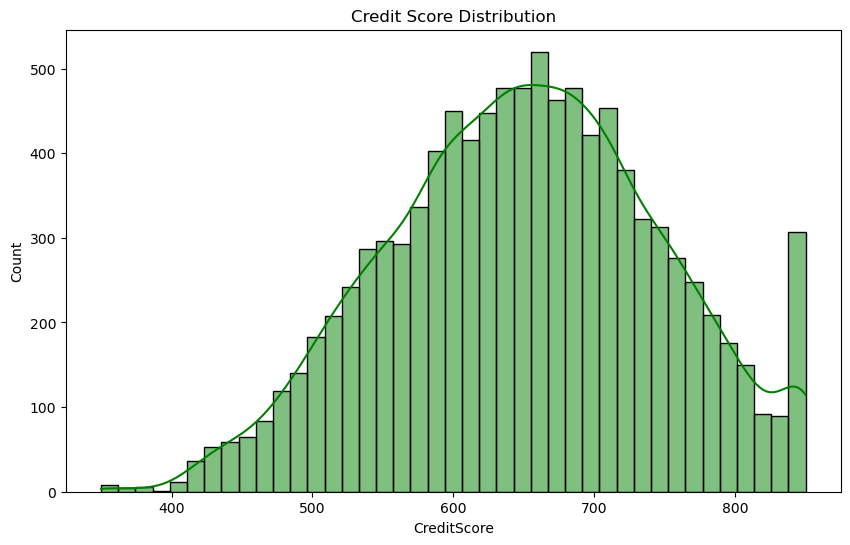

In [34]:
# Histogram for Credit Score
plt.figure(figsize=(10, 6))
sns.histplot(df['CreditScore'], kde=True, color='green')
plt.title('Credit Score Distribution')
plt.show()

## 3. Balance and Estimated Salary Analysis

Insight: Distribution of balances and estimated salaries.

## Balance Distribution

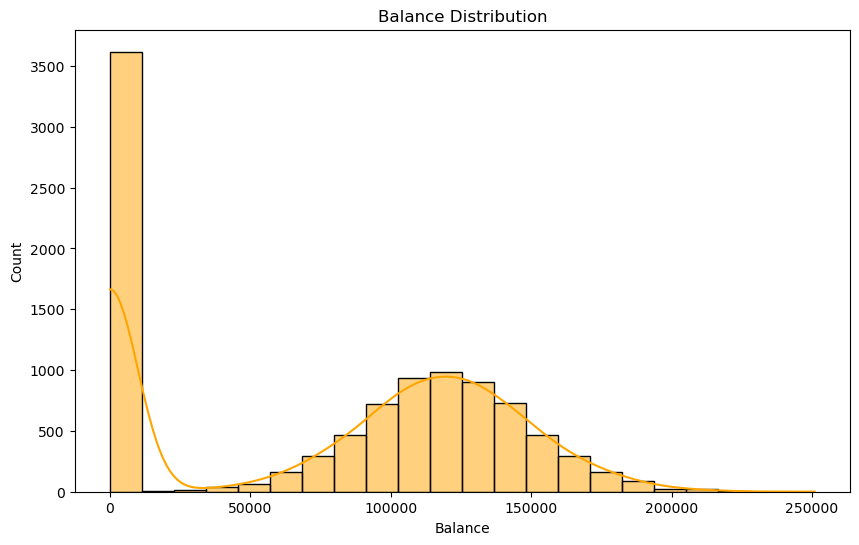

In [38]:
# Histogram for Balance
plt.figure(figsize=(10, 6))
sns.histplot(df['Balance'], kde=True, color='orange')
plt.title('Balance Distribution')
plt.show()

The above Histogram is showing balance distribution.

## Estimated Salary Distribution

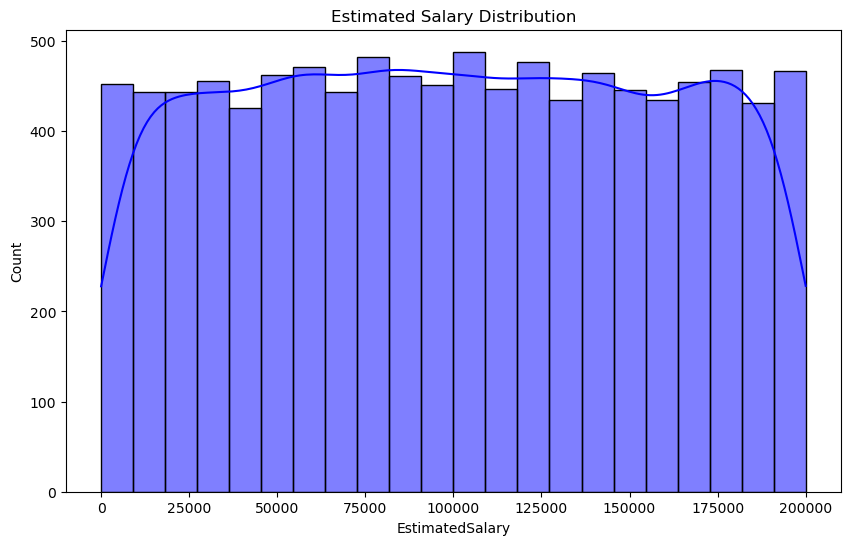

In [41]:
# Histogram for Estimated Salary
plt.figure(figsize=(10, 6))
sns.histplot(df['EstimatedSalary'], kde=True, color='blue')
plt.title('Estimated Salary Distribution')
plt.show()

The above Histogram is showing estimated salary distribution.

## 4. Churn Analysis

Insight: Proportion of customers who have exited (churned) and factors influencing churn.

## Churn Rate

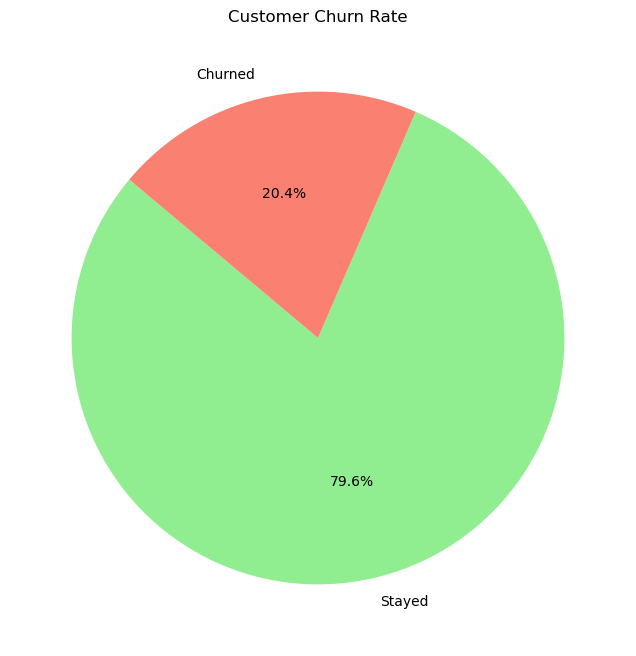

In [46]:
# Pie chart for Churn Rate
churn_counts = df['Exited'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=['Stayed', 'Churned'], autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'salmon'])
plt.title('Customer Churn Rate')
plt.show()

The above Pie chart is showing the proportion of customers who have churned.

## Churn by Geography

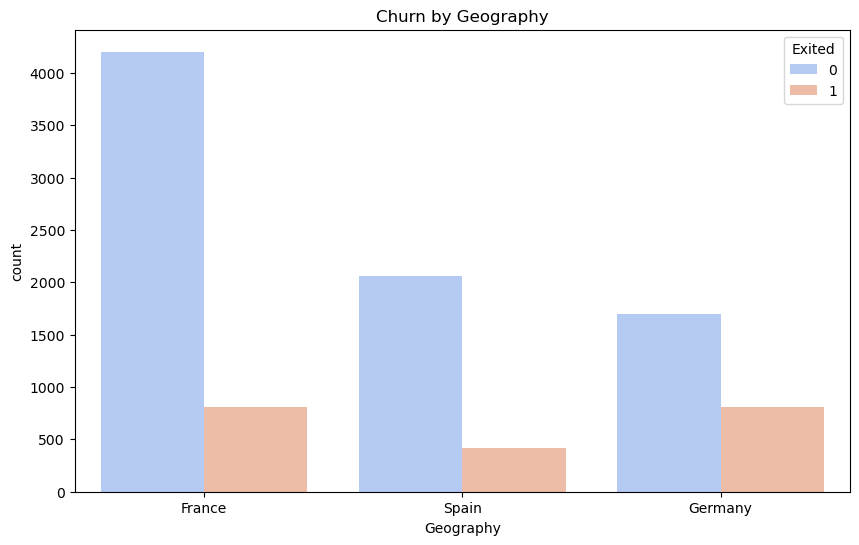

In [49]:
# Bar chart for Churn by Geography
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', hue='Exited', data=df, palette='coolwarm')
plt.title('Churn by Geography')
plt.show()

The above Bar chart is comparing churn rates across different countries.

## Churn by Tenure

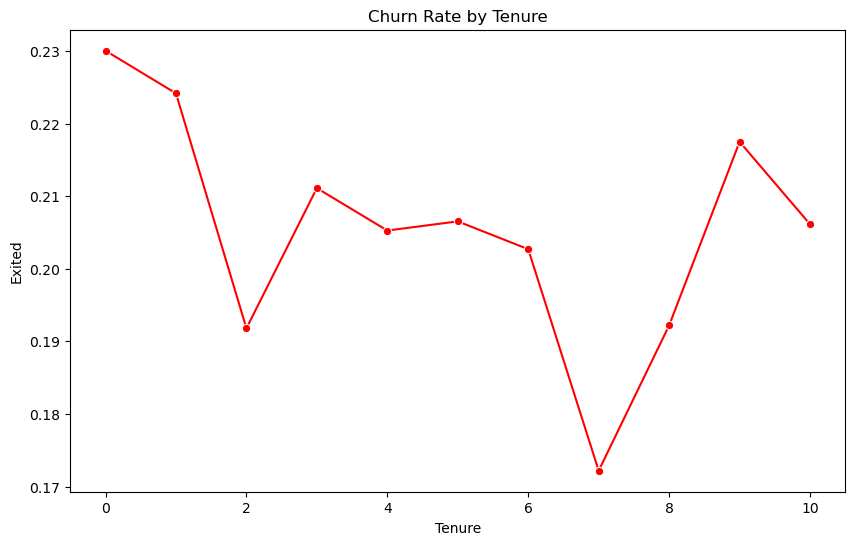

In [52]:
# Line plot for Churn by Tenure
tenure_churn = df.groupby('Tenure')['Exited'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Tenure', y='Exited', data=tenure_churn, marker='o', color='red')
plt.title('Churn Rate by Tenure')
plt.show()

The above Line plot is showing the relationship between tenure and churn rate.

## 5. Product and Services Analysis

Insight: Distribution of the number of products customers have and their credit card ownership.

## Number of Products

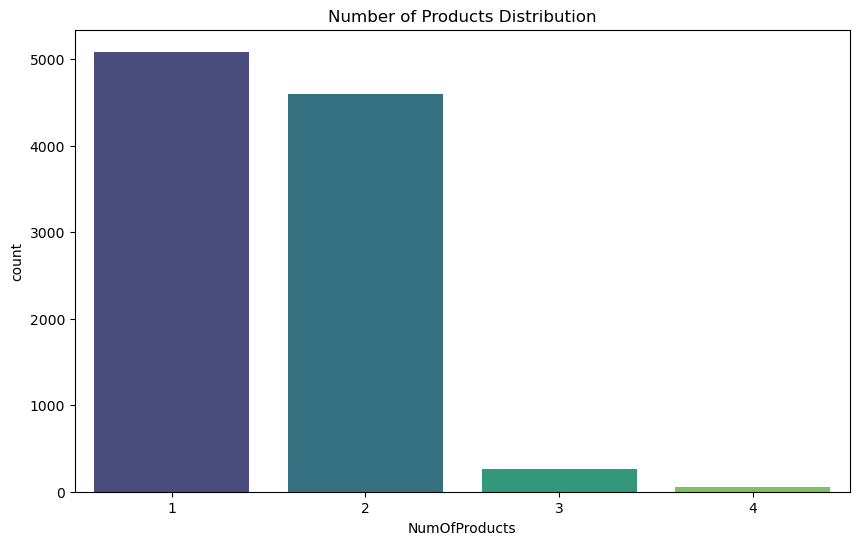

In [57]:
# Bar chart for Number of Products
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', data=df, palette='viridis')
plt.title('Number of Products Distribution')
plt.show()

The above Bar chart is showing the distribution of the number of products customers have.

## Number of products vs Balance

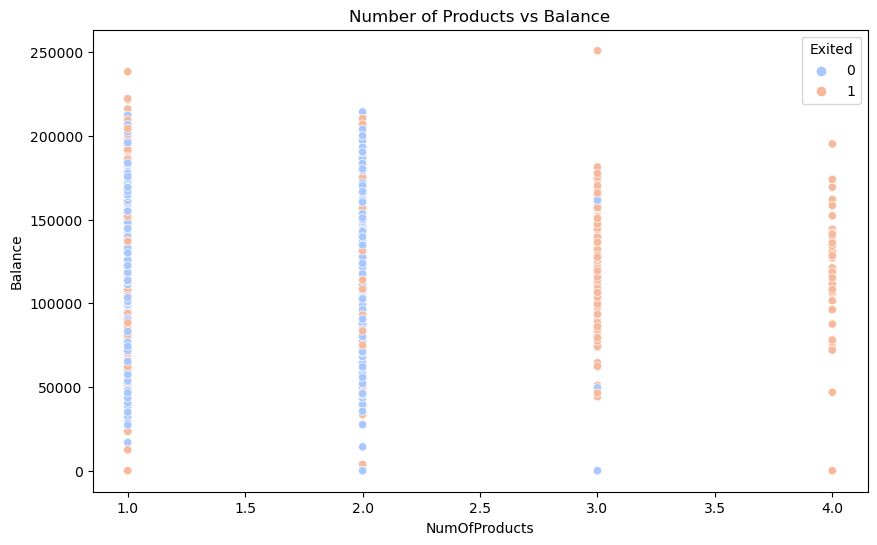

In [60]:
# Scatter plot for Number of Products vs Balance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumOfProducts', y='Balance', data=df, hue='Exited', palette='coolwarm')
plt.title('Number of Products vs Balance')
plt.show()

The above scatter plot shows the Relationship between the number of products and balance

## Credit Card Ownership

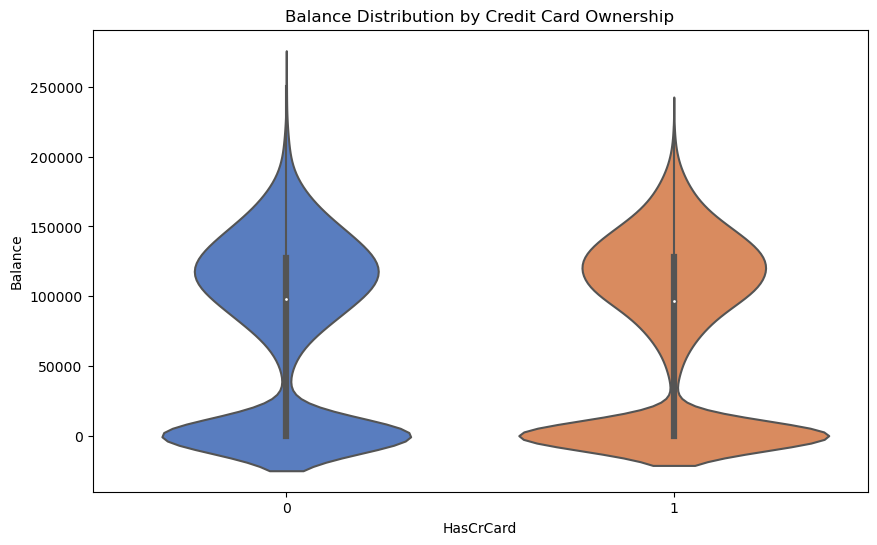

In [63]:
# Violin plot for Balance by Credit Card Ownership
plt.figure(figsize=(10, 6))
sns.violinplot(x='HasCrCard', y='Balance', data=df, palette='muted')
plt.title('Balance Distribution by Credit Card Ownership')
plt.show()

The above violin plot shows the Distribution of balance for customers with and without credit cards.

## Balance By Card Type

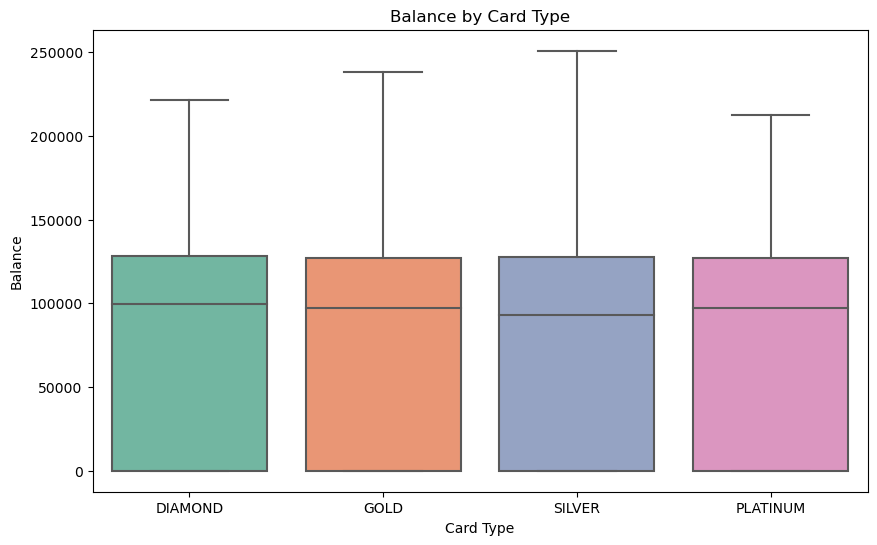

In [66]:
# Box plot for Balance by Card Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Card Type', y='Balance', data=df, palette='Set2')
plt.title('Balance by Card Type')
plt.show()

The above Box plot shows the Distribution of balance for different card types.